<a href="https://colab.research.google.com/github/Mateus-Scalioni/Walmart/blob/main/Walmart_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importando as bibliotecas necessárias.

In [190]:

# Importando biblioteca necessária
import io # bibliioteca que contem o comando para ler do GDrive
import  pandas  as  pd  #Poderosa ferramenta de manipulação de análise de dados.
import  numpy  as  np #Importante para operações matemáticas 
import matplotlib as plt #Matplotlibé uma biblioteca Python abrangente para visualização de dados.
import  seaborn  as  sb #Uma interface de alto nível desenvolvida matplotlibpara desenhar gráficos estatísticos atraentes e informativos.

# import importará todos os módulos, para importar apenas o necessário utilizamos from.
from google.colab import files # biblioteca para ler o arquivo
from datetime import date #classes para manipulação de datas 
from prophet import Prophet



##Importando conjunto de dados



In [ ]:

file_uploaded = files.upload() #upando a planilha e guardadndo a planilha numa variavel
# Leitura do arquivo

data = pd.read_csv(io.BytesIO( file_uploaded['Walmart.csv'] ) )


Saving Walmart.csv to Walmart (1).csv


In [ ]:

file_uploaded = files.upload() #upando a planilha e guardadndo a planilha numa variavel
# Leitura do arquivo

dep = pd.read_csv(io.BytesIO( file_uploaded['train.csv'] ) )


Saving train.csv to train (1).csv


##Inspecionando os dados

In [ ]:
data.shape

(6435, 8)

In [ ]:
data.head()
#vizualizar 5 primeiras linhas 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.info()
#fornece as informações básicas sobre o conjunto de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#transformando os valores de data no  tipo correto
data['Date'] = pd.to_datetime(data['Date'])
data.Date


0      2010-05-02
1      2010-12-02
2      2010-02-19
3      2010-02-26
4      2010-05-03
          ...    
6430   2012-09-28
6431   2012-05-10
6432   2012-12-10
6433   2012-10-19
6434   2012-10-26
Name: Date, Length: 6435, dtype: datetime64[ns]

In [ ]:
#Mudando os nomes das colunas para facilitar
data.columns=['código_da_loja','semanas_de_vendas','vendas_por_loja','feriado','temperatura ','Preço','Índice_de_preço','taxa_de_desemprego']

In [ ]:
data.head()

,código_da_loja,semanas_de_vendas,vendas_por_loja,feriado,temperatura,Preço,Índice_de_preço,taxa_de_desemprego
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


##Limpando


In [ ]:
data.isnull().sum()
#: detecta e conta valores ausentes (NaN) com isnull 

código_da_loja        0
semanas_de_vendas     0
vendas_por_loja       0
feriado               0
temperatura           0
Preço                 0
Índice_de_preço       0
taxa_de_desemprego    0
dtype: int64

In [ ]:
#retorna true onde tem duplicada
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6430    False
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [ ]:
dep.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
dep.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
421565    False
421566    False
421567    False
421568    False
421569    False
Length: 421570, dtype: bool

Como tive bons resultados deixei os dados assim mesmo

##Qual é o impacto dos feriados (promoções também) nas vendas das lojas?




data.corr()
*   -1 associaçao negativa
*   0 nao há associação
*   1 associação positiva


In [ ]:
data.corr(method ='spearman')

,código_da_loja,vendas_por_loja,feriado,temperatura,Preço,Índice_de_preço,taxa_de_desemprego
código_da_loja,1.000000,-0.309227,0.000000,-0.026392,0.064878,-0.238852,0.304139
vendas_por_loja,-0.309227,1.000000,0.027774,-0.070962,0.025471,-0.055040,-0.062354
feriado,0.000000,0.027774,1.000000,-0.143588,-0.080111,-0.004752,0.011177
temperatura,-0.026392,-0.070962,-0.143588,1.000000,0.128624,0.165957,0.038833
Preço,0.064878,0.025471,-0.080111,0.128624,1.000000,-0.045867,-0.064725
Índice_de_preço,-0.238852,-0.055040,-0.004752,0.165957,-0.045867,1.000000,-0.388563
taxa_de_desemprego,0.304139,-0.062354,0.011177,0.038833,-0.064725,-0.388563,1.000000


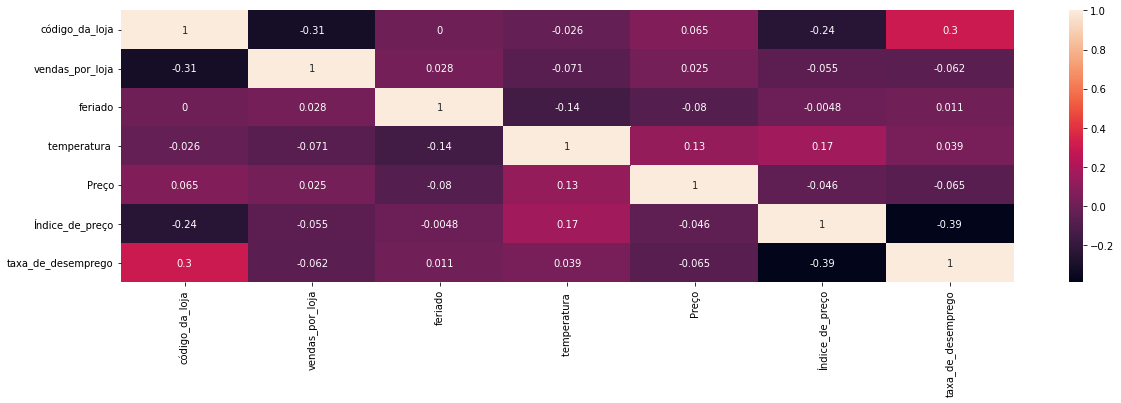

In [ ]:
aux = sb.heatmap(data.corr(method ='spearman'), annot = True)
aux.figure.set_size_inches(20, 5)

In [ ]:
data.corr(method ='pearson')


,código_da_loja,vendas_por_loja,feriado,temperatura,Preço,Índice_de_preço,taxa_de_desemprego
código_da_loja,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
vendas_por_loja,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
feriado,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
temperatura,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Preço,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
Índice_de_preço,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
taxa_de_desemprego,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


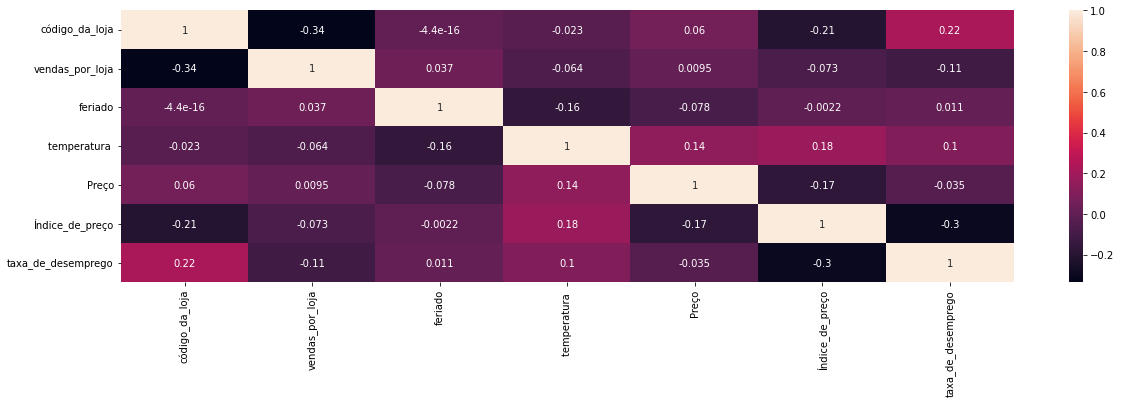

In [ ]:
aux = sb.heatmap(data.corr(method ='pearson'), annot = True)
aux.figure.set_size_inches(20, 5)

In [ ]:
data.corr(method='kendall')


,código_da_loja,vendas_por_loja,feriado,temperatura,Preço,Índice_de_preço,taxa_de_desemprego
código_da_loja,1.000000,-0.209491,0.000000,-0.017043,0.044066,-0.150699,0.209715
vendas_por_loja,-0.209491,1.000000,0.022679,-0.046858,0.017218,-0.041716,-0.046688
feriado,0.000000,0.022679,1.000000,-0.117262,-0.065470,-0.003882,0.009144
temperatura,-0.017043,-0.046858,-0.117262,1.000000,0.078911,0.113739,0.026038
Preço,0.044066,0.017218,-0.065470,0.078911,1.000000,-0.029558,-0.041399
Índice_de_preço,-0.150699,-0.041716,-0.003882,0.113739,-0.029558,1.000000,-0.299380
taxa_de_desemprego,0.209715,-0.046688,0.009144,0.026038,-0.041399,-0.299380,1.000000


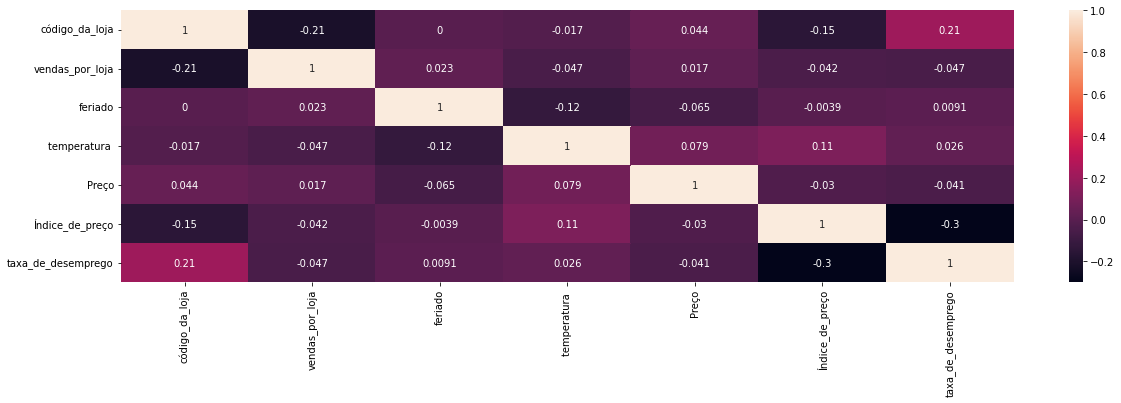

In [ ]:
aux = sb.heatmap(data.corr(method='kendall'), annot = True)
aux.figure.set_size_inches(20, 5)

Analisando o resultado obtido podemos ver que as vendas não tem uma correlação forte com os feriados.

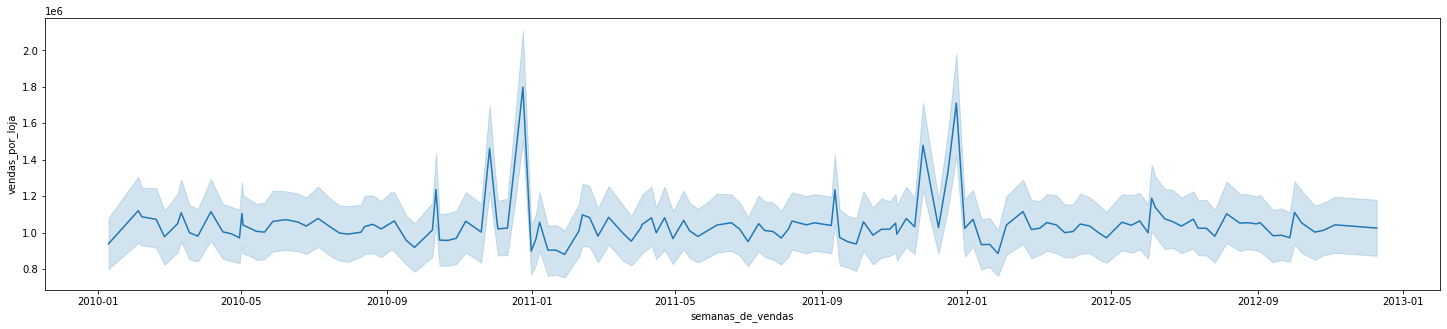

In [ ]:
aux = sb.lineplot(x= 'semanas_de_vendas', y='vendas_por_loja', data=data)
aux.figure.set_size_inches(25, 5)

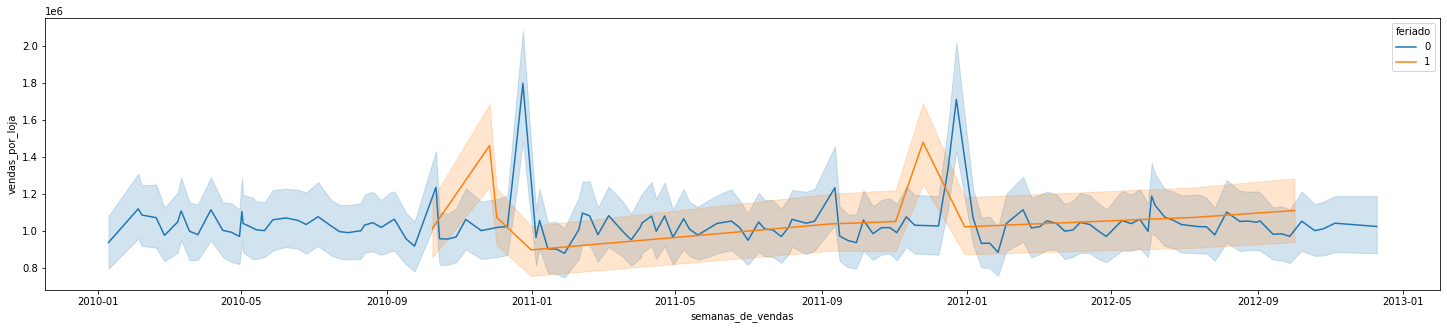

In [ ]:
#aux = sb.lineplot(x= 'Date', y='Weekly_Sales', data=data, hue= 'Holiday_Flag')
aux = sb.lineplot(x= 'semanas_de_vendas', y='vendas_por_loja', data=data, hue= 'feriado')
aux.figure.set_size_inches(25, 5)


In [ ]:
data.head

<bound method NDFrame.head of       código_da_loja semanas_de_vendas  vendas_por_loja  feriado  \
0                  1        2010-05-02       1643690.90        0   
1                  1        2010-12-02       1641957.44        1   
2                  1        2010-02-19       1611968.17        0   
3                  1        2010-02-26       1409727.59        0   
4                  1        2010-05-03       1554806.68        0   
...              ...               ...              ...      ...   
6430              45        2012-09-28        713173.95        0   
6431              45        2012-05-10        733455.07        0   
6432              45        2012-12-10        734464.36        0   
6433              45        2012-10-19        718125.53        0   
6434              45        2012-10-26        760281.43        0   

      temperatura   Preço  Índice_de_preço  taxa_de_desemprego Super_Bowl  \
0            42.31  2.572       211.096358               8.106      False   

In [ ]:
dep.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
#Como passado no email as datas do feriado, estou fazendo um filtro para conseguir fazer uma analise da vendas médias semanais especificamente em cada feriado
# - Super Bowl -> 12-Feb-10 (12/02/2010), 11-Feb-11(11/02/2011), 10-Feb-12(10/02/2012), 8-Feb-13(08/02/2013)
# - Labor Day -> 10-Sep-10(10/09/2010), 9-Sep-11(09/09/2011), 7-Sep-12(07/09/2012), 6-Sep-13(06/09/2013)
# - Thanksgiving -> 26-Nov-10(26/11/2010), 25-Nov-11(25/11/2011), 23-Nov-12(23/11/2012), 29-Nov-13(29/11/13)
# - Christmas -> 31-Dec-10(31/12/2010), 30-Dec-11(30/12/11), 28-Dec-12(28/12/2012), 27-Dec-13(27/12/2013)

In [ ]:
# Super bowl dates in train set # - Super Bowl -> 12-Feb-10 (12/02/2010), 11-Feb-11(11/02/2011), 10-Feb-12(10/02/2012), 8-Feb-13(08/02/2013)

data.loc[(data['semanas_de_vendas'] == '2010-02-12')|(data['semanas_de_vendas'] == '2011-02-11')|(data['semanas_de_vendas'] == '2012-02-10')|(data['semanas_de_vendas'] == '2013-02-08'),'Super_Bowl'] = True
data.loc[(data['semanas_de_vendas'] != '2010-02-12')&(data['semanas_de_vendas'] != '2011-02-11')&(data['semanas_de_vendas'] != '2012-02-10')&(data['semanas_de_vendas'] == '2013-02-08'),'Super_Bowl'] = False

In [ ]:
# Labor day dates in train set
data.loc[(data['semanas_de_vendas'] == '2010-09-10')|(data['semanas_de_vendas'] == '2011-09-09')|(data['semanas_de_vendas'] == '2012-09-07')|(data['semanas_de_vendas'] == '2013-09-13'),'Labor_Day'] = True
data.loc[(data['semanas_de_vendas'] != '2010-09-10')&(data['semanas_de_vendas'] != '2011-09-09')&(data['semanas_de_vendas'] != '2012-09-07')&(data['semanas_de_vendas'] == '2013-09-13'),'Labor_Day'] = False

In [ ]:
# Thanksgiving dates in train set
data.loc[(data['semanas_de_vendas'] == '2010-11-26')|(data['semanas_de_vendas'] == '2011-11-25')|(data['semanas_de_vendas'] == '2012-11-23')|(data['semanas_de_vendas'] == '2013-11-29'),'Thanksgiving'] = True
data.loc[(data['semanas_de_vendas'] != '2010-11-26')&(data['semanas_de_vendas'] != '2011-11-25')&(data['semanas_de_vendas'] == '2012-11-23')&(data['semanas_de_vendas'] == '2013-11-29'),'Thanksgiving'] = False

In [ ]:
#Christmas dates in train set# - Christmas -> 31-Dec-10(31/12/2010), 30-Dec-11(30/12/11), 28-Dec-12(28/12/2012), 27-Dec-13(27/12/2013)
data.loc[(data['semanas_de_vendas'] == '2010-12-31')|(data['semanas_de_vendas'] == '2011-12-30')|(data['semanas_de_vendas'] == '2012-12-28')|(data['semanas_de_vendas'] == '2013-12-27'),'Christmas'] = True
data.loc[(data['semanas_de_vendas'] != '2010-12-31')&(data['semanas_de_vendas'] != '2011-12-30')&(data['semanas_de_vendas'] == '2012-12-28')&(data['semanas_de_vendas'] == '2013-12-27'),'Christmas'] = False

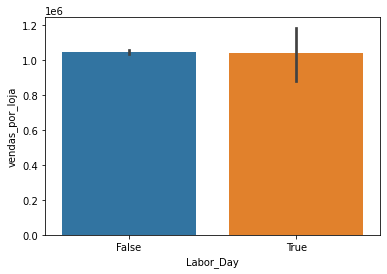

In [ ]:
sb.barplot(x='Labor_Day', y='vendas_por_loja', data=data) # Labor_Day vs not Labor_Day

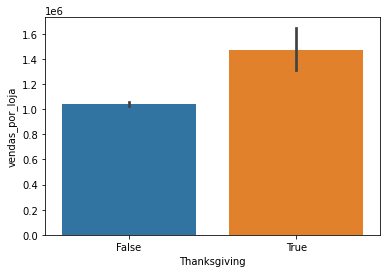

In [ ]:
sb.barplot(x='Thanksgiving', y='vendas_por_loja', data=data) # Thanksgiving  vs not Thanksgiving

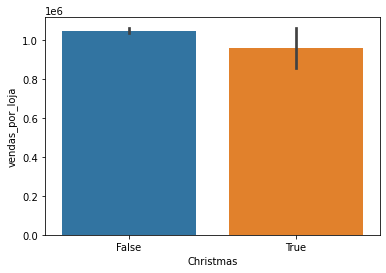

In [ ]:
sb.barplot(x='Christmas', y='vendas_por_loja', data=data) # Christmas  vs not Christmas

A partir dos gráficos acima, podemos inferir que Labor Day não a aumento das vendas, assim o feriado não tem forte impacto nas vendas.

Já em Thanksgiving, podemos observar uma grande diferença no número de vendas. Um impacto positivo dos feriados nas vendas semanais.

Diferentemente ao Christmas, em que a uma pequena diferença nas vendas de forma negativa, resultado que indica um comportamento de compra antecipada dos consumidores.


##Existe algum setor que desempenhe melhor?


In [ ]:
dep.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


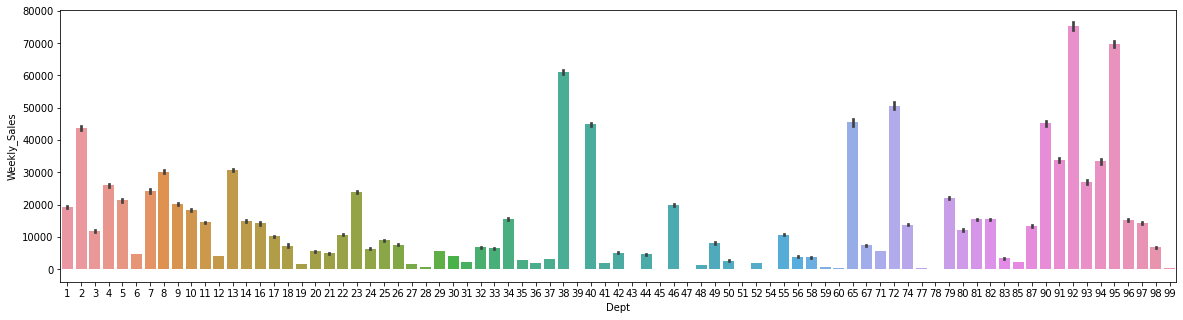

In [ ]:
plot = sb.barplot(x='Dept', y='Weekly_Sales', data=dep)
plot.figure.set_size_inches(20, 5)

A partir do gráfico verifica-se que o departamento 92 tem uma média de vendas superior.

##É possível estimar as vendas das lojas por semana em datas futuras de 2012–11–02 a 2013–07-26? Se sim, quais seriam esses valores?

In [ ]:
# Transformação de Date em formato de datetime
data['semanas_de_vendas'] = pd.to_datetime(data.semanas_de_vendas, infer_datetime_format=True)

#utilizando o pandas para inferir qual deve ser o formato correto

In [ ]:
# Tabela com acessos por mês e ano
vendas_semanal = data[['semanas_de_vendas','vendas_por_loja']]\
  .groupby(['semanas_de_vendas'], as_index = True)\
  .sum()\
  .reset_index()\
  .sort_values(['semanas_de_vendas'], ascending=True)\
  .rename(columns={"semanas_de_vendas": "ds", "vendas_por_loja": "y"})

# Espiando o resultado do agrupamento
vendas_semanal.head()

,ds,y
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13


In [ ]:
vendas_semanal.tail()

,ds,y
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99
142,2012-12-10,46128514.25


In [ ]:
# Criando o modelo preditivo
modelo = Prophet()
# Ajustando o modelo aos dados
modelo.fit(vendas_semanal)

#fit serve para treinar modelo de dados
#vendo vieses de comportamento de dados

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0fdf3a38/y7mt1g0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0fdf3a38/490abryf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57959', 'data', 'file=/tmp/tmp0fdf3a38/y7mt1g0y.json', 'init=/tmp/tmp0fdf3a38/490abryf.json', 'output', 'file=/tmp/tmp0fdf3a38/prophet_modelwvzasjub/prophet_model-20221223131423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Criando o dataframe que vai receber as previsões através da função ‘make_future_dataframe’,
# onde devemos colocar quantos períodos à frente dos dados de treino, a frequência dos dados
# (se anual , mensal, diário, ou no caso dos dados que estamos trabalhando semanal), 
# e também definir se deseja estimar o dados através do modelo no período de treino (o default é True):


st_futuro = modelo.make_future_dataframe(
    periods= 30, 
    freq = 'w', 
    include_history = True

)

In [ ]:
# Realizando as previsões
previsao = modelo.predict(st_futuro)

In [ ]:
previsao.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
168,2013-06-09,4.782741e+07,4.475025e+07,5.497563e+07,4.782736e+07,4.782745e+07,1.853452e+06,1.853452e+06,1.853452e+06,1.635780e+06,1.635780e+06,1.635780e+06,2.176716e+05,2.176716e+05,2.176716e+05,0.0,0.0,0.0,4.968086e+07
169,2013-06-16,4.783023e+07,4.486959e+07,5.549660e+07,4.783018e+07,4.783027e+07,2.285975e+06,2.285975e+06,2.285975e+06,1.635780e+06,1.635780e+06,1.635780e+06,6.501946e+05,6.501946e+05,6.501946e+05,0.0,0.0,0.0,5.011620e+07
170,2013-06-23,4.783305e+07,4.483837e+07,5.534150e+07,4.783300e+07,4.783310e+07,2.090921e+06,2.090921e+06,2.090921e+06,1.635780e+06,1.635780e+06,1.635780e+06,4.551410e+05,4.551410e+05,4.551410e+05,0.0,0.0,0.0,4.992397e+07
171,2013-06-30,4.783587e+07,4.314084e+07,5.382721e+07,4.783582e+07,4.783592e+07,8.578526e+05,8.578526e+05,8.578526e+05,1.635780e+06,1.635780e+06,1.635780e+06,-7.779275e+05,-7.779275e+05,-7.779275e+05,0.0,0.0,0.0,4.869372e+07
172,2013-07-07,4.783869e+07,4.166913e+07,5.240280e+07,4.783864e+07,4.783874e+07,-4.809759e+05,-4.809759e+05,-4.809759e+05,1.635780e+06,1.635780e+06,1.635780e+06,-2.116756e+06,-2.116756e+06,-2.116756e+06,0.0,0.0,0.0,4.735772e+07


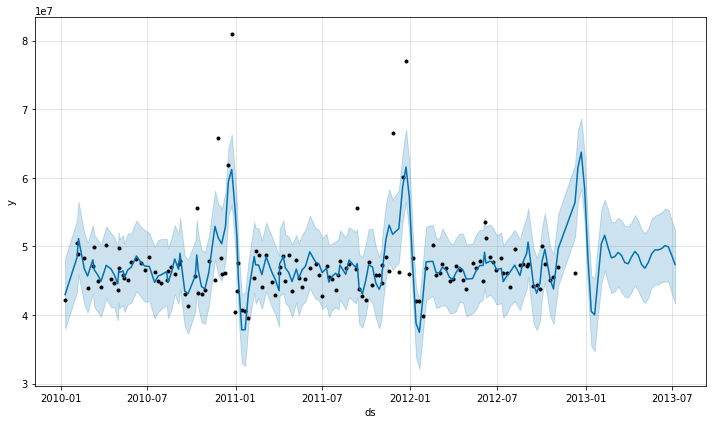

In [ ]:
# Fazendo grafico da previsao
grafico_previsao_Prophet = modelo.plot(previsao)
grafico_previsao_Prophet.show()

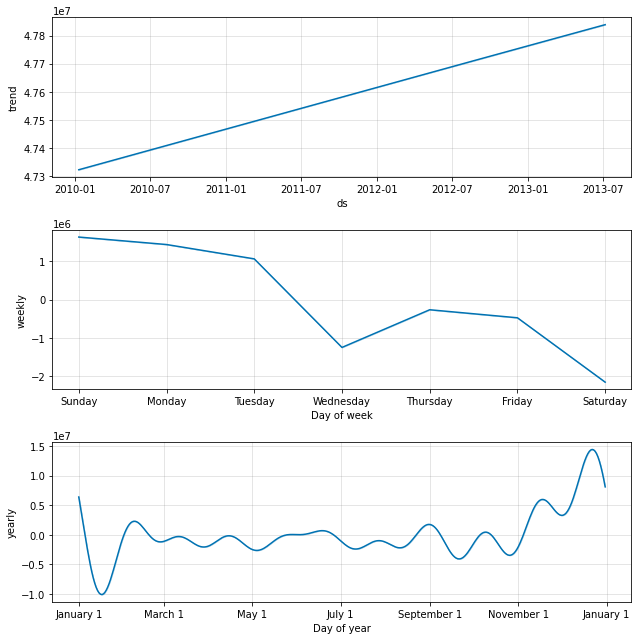

In [ ]:
fig2 = modelo.plot_components(previsao)


Com esses gráficos conseguimos ver a tendência de crescimento da série